<b>Pyber Ride Sharing</b>

Analysis #1 About 2/3 of the evaluated Pyber transactions occurred in urban areas<br>
Analysis #2 Almost 1/3 of the Pyber revenue was collected in suburban areas<br>
Analylsis #3 Pyber activity by volume and revenue is greates in the urban areas evaluated

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
city_csv = pd.read_csv('raw_data/city_data.csv')
ride_csv = pd.read_csv('raw_data/ride_data.csv')

In [40]:
city_csv.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [41]:
ride_csv.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [42]:
combined_df = pd.merge(ride_csv, city_csv, on="city")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [43]:
cond_urban = combined_df.type == "Urban"
subset_urban = combined_df[cond_urban].dropna()

urban_df1 = subset_urban.pivot_table(index="city", values="fare", aggfunc=np.mean)
urban_df1 = urban_df1.reset_index()

urban_df2 = subset_urban.pivot_table(index="city", values="ride_id", aggfunc='count')
urban_df2 = urban_df2.reset_index()

urban_df = urban_df1.merge(urban_df2, on="city")
urban_df.columns = ['city', 'average_fare', 'number_of_rides']
urban_df = pd.merge(urban_df, city_csv, on="city")



cond_rural = combined_df.type == "Rural"
subset_rural = combined_df[cond_rural].dropna()

rural_df1 = subset_rural.pivot_table(index="city", values="fare", aggfunc=np.mean)
rural_df1 = rural_df1.reset_index()

rural_df2 = subset_rural.pivot_table(index="city", values="ride_id", aggfunc='count')
rural_df2 = rural_df2.reset_index()

rural_df = rural_df1.merge(rural_df2, on="city")
rural_df.columns = ['city', 'average_fare', 'number_of_rides']
rural_df = pd.merge(rural_df, city_csv, on="city")




cond_suburb = combined_df.type == "Suburban"
subset_suburb = combined_df[cond_suburb].dropna()

suburb_df1 = subset_suburb.pivot_table(index="city", values="fare", aggfunc=np.mean)
suburb_df1 = suburb_df1.reset_index()

suburb_df2 = subset_suburb.pivot_table(index="city", values="ride_id", aggfunc='count')
suburb_df2 = suburb_df2.reset_index()

suburb_df = suburb_df1.merge(suburb_df2, on="city")
suburb_df.columns = ['city', 'average_fare', 'number_of_rides']
suburb_df = pd.merge(suburb_df, city_csv, on="city")


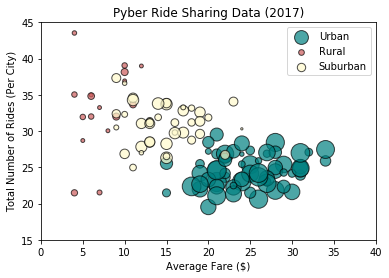

In [44]:
plt.scatter(urban_df['number_of_rides'], urban_df["average_fare"], label="Urban", alpha=0.7, marker="o", facecolors="teal", edgecolors="black", sizes=urban_df['driver_count']*5)
plt.scatter(rural_df['number_of_rides'], rural_df["average_fare"], label="Rural", alpha=0.7, marker="o", facecolors="indianred", edgecolors="black", sizes=rural_df['driver_count']*5)
plt.scatter(suburb_df['number_of_rides'], suburb_df["average_fare"], label="Suburban", alpha=0.7, marker="o", facecolors="lemonchiffon", edgecolors="black", sizes=suburb_df['driver_count']*5)

plt.xlim(0,40)
plt.ylim(15,45)
plt.title("Pyber Ride Sharing Data (2017)")
plt.legend(loc="best")
plt.ylabel("Total Number of Rides (Per City)")
plt.xlabel("Average Fare ($)")
plt.show()

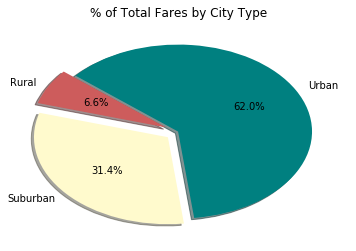

In [45]:
pie_df = pd.pivot_table(combined_df, values="fare", index="type", aggfunc=np.sum)
pie_df

plt.pie(pie_df, autopct="%1.1f%%", colors=['indianred','lemonchiffon','teal'], labels= ["Rural","Suburban","Urban"], explode=[0.1,0.1,0], shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

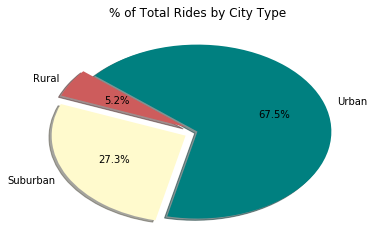

In [46]:
pie_df2 = pd.pivot_table(combined_df, values="fare", index="type", aggfunc='count')
pie_df2

plt.pie(pie_df2, autopct="%1.1f%%", colors=['indianred','lemonchiffon','teal'], labels= ["Rural","Suburban","Urban"], explode=[0.1,0.1,0], shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

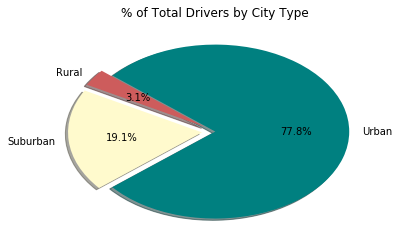

In [47]:
pie_df3 = pd.pivot_table(city_csv, values="driver_count", index="type", aggfunc=np.sum)
pie_df3

plt.pie(pie_df3, autopct="%1.1f%%", colors=['indianred','lemonchiffon','teal'], labels= ["Rural","Suburban","Urban"], explode=[0.1,0.1,0], shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()